In [3]:
# 워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import jpype
from konlpy.tag import Okt # <- jpype 부터 불러와야 불러오기 가능
from PIL import Image

import pandas as pd
import numpy as np
import os
import string
import sys
import re
import datetime as dt
# now = dt.datetime.now().strftime('%y%m%d_%H%M%S')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# 진행 여부 함수
def yes_or_no(question):
    while "the answer is invalid":
        reply = str(input(question+' (y/n): ')).lower().strip()
        if reply[0] == 'y':
            return True
        if reply[0] == 'n':
            return False
        else:
            print("실패: 'y' 혹은 'n' 를 입력해 주세요")

ModuleNotFoundError: No module named 'jpype'

In [156]:
# 파일 불러오기
sheet_name = "컬럼분석"
input_path = os.path.join(os.getcwd(), "data\\")
output_path = os.path.join(os.getcwd(), "data\\out\\")
data = pd.read_excel(input_path+"기상자료개방포털 컬럼 조사.xlsx", sheet_name=sheet_name, header=0)

# # null 제거
# for i in range(len(input_test.columns)):
#     input_test[input_test.columns[i]] = input_test[input_test.columns[i]].fillna("")
# print(input_test.shape)
# input_test.head(5)

### 대분류 나누기( Data1 ~ Data11)

In [157]:
# 컬럼리스트 만들기
col_list = data.columns.to_list()
col_list

['INDEX',
 '대분류',
 '중분류',
 '소분류',
 '제공자료컬럼',
 '예시',
 '체크박스항목1',
 '체크박스항목예시1',
 '체크박스항목1Depth',
 '체크박스항목2',
 '체크박스항목예시2',
 '체크박스항목2Depth',
 '체크박스항목3',
 '체크박스항목예시3',
 '체크박스항목3Depth',
 '추가',
 '특이사항']

# 우선 전체만 했지만, 분류 + 병합 순서로 ㄱ

In [208]:
# 체크박스항목1,2,3 리스트
chkBox_catgr_list_1 = data['체크박스항목1'].drop_duplicates().reset_index()
chkBox_catgr_list_2 = data['체크박스항목2'].drop_duplicates().reset_index()
chkBox_catgr_list_3 = data['체크박스항목3'].drop_duplicates().reset_index()

# 체크박스 카테고리 사전
chkBox_catgr_list_1.columns = ['index', '체크박스항목']
chkBox_catgr_list_2.columns = ['index', '체크박스항목']
chkBox_catgr_list_3.columns = ['index', '체크박스항목']
chkBox_catgr_list_total = pd.concat([chkBox_catgr_list_1,chkBox_catgr_list_2,chkBox_catgr_list_3], axis=0)
chkBox_catgr_list_total

,index,체크박스항목
0,0,지점
1,17,NaN
2,54,지점-농업
3,100,지점-강원도
4,280,지점-황사
5,320,지점-부이
6,348,지점-등표
7,364,지점-파고부이
8,447,지점-레윈존데
9,457,지점-윈드프로파일러


In [209]:
# # 각 데이터셋 분류
# # 한 엑셀 파일에 저장
# writer=pd.ExcelWriter(output_path + "test.xlsx", engine='openpyxl')
# for i,j in zip(lar_catgr,range(len(lar_catgr))):
#     globals()["data_lar_{}".format(j)] = data['대분류'] == i
#     globals()["data_lar_{}".format(j)] = data[globals()["data_lar_{}".format(j)]==True]
#     globals()["data_lar_{}".format(j)].to_excel(writer, sheet_name=i)
# writer.save()
# data_lar_0.head()

In [160]:
#대분류x제공자료컬럼
#대분류x체크박스항목

In [210]:
# 체크박스항목1,2,3 리스트
chkBox_catgr_list_1 = data['체크박스항목1'].drop_duplicates().reset_index()
chkBox_catgr_list_2 = data['체크박스항목2'].drop_duplicates().reset_index()
chkBox_catgr_list_3 = data['체크박스항목3'].drop_duplicates().reset_index()

# 체크박스 카테고리 사전
chkBox_catgr_list_1.columns = ['index', '체크박스항목']
chkBox_catgr_list_2.columns = ['index', '체크박스항목']
chkBox_catgr_list_3.columns = ['index', '체크박스항목']
chkBox_catgr_list_total = pd.concat([chkBox_catgr_list_1,chkBox_catgr_list_2,chkBox_catgr_list_3], axis=0)
chkBox_catgr_list_total

,index,체크박스항목
0,0,지점
1,17,NaN
2,54,지점-농업
3,100,지점-강원도
4,280,지점-황사
5,320,지점-부이
6,348,지점-등표
7,364,지점-파고부이
8,447,지점-레윈존데
9,457,지점-윈드프로파일러


In [211]:
# 체크박스항목1,2,3 리스트
chkBox_1 = data.loc[data['체크박스항목1'].notna(), '체크박스항목1'].reset_index()
chkBox_2 = data.loc[data['체크박스항목2'].notna(), '체크박스항목2'].reset_index()
chkBox_3 = data.loc[data['체크박스항목3'].notna(), '체크박스항목3'].reset_index()

# 체크박스 카테고리 사전
chkBox_1.columns = ['index', '체크박스항목']
chkBox_2.columns = ['index', '체크박스항목']
chkBox_3.columns = ['index', '체크박스항목']
chkBox_total = pd.concat([chkBox_1,chkBox_2,chkBox_3], axis=0).reset_index(drop=True)
chkBox_total

,index,체크박스항목
0,0,지점
1,1,지점
2,2,지점
3,3,지점
4,4,지점
...,...,...
2740,1604,시간-예측시간
2741,1605,시간-예측시간
2742,1606,시간-예측시간
2743,1607,시간-예측시간


In [212]:
for i in range(len(chkBox_total)):
    chkBox_total.loc[i, '체크박스항목전처리'] = chkBox_total.loc[i,'체크박스항목'].split("-")[0]
chkBox_total

,index,체크박스항목,체크박스항목전처리
0,0,지점,지점
1,1,지점,지점
2,2,지점,지점
3,3,지점,지점
4,4,지점,지점
...,...,...,...
2740,1604,시간-예측시간,시간
2741,1605,시간-예측시간,시간
2742,1606,시간-예측시간,시간
2743,1607,시간-예측시간,시간


In [215]:
chkBox_total_groupBy = chkBox_total.groupby('체크박스항목전처리').sum().reset_index().sort_values('index', ascending=False)
chkBox_total_groupBy

,체크박스항목전처리,index
15,지점,1013194
7,시간,328653
10,자료구분,319420
14,지역,316702
12,자료형태,312388
5,분류,162115
13,종류,122528
0,관측,101698
8,예보,73138
4,기후,63824


In [216]:
noun_chkBox = chkBox_total_groupBy.iloc[:,0].to_list()
cnt_chkBox = chkBox_total_groupBy.iloc[:,1].to_list()
cloud_dict_chkBox = dict(zip(noun_chkBox,cnt_chkBox))
cloud_dict_chkBox

{'지점': 1013194,
 '시간': 328653,
 '자료구분': 319420,
 '지역': 316702,
 '자료형태': 312388,
 '분류': 162115,
 '종류': 122528,
 '관측': 101698,
 '예보': 73138,
 '기후': 63824,
 '규모': 53534,
 '구분': 32661,
 '응용': 21594,
 '수치모델': 20974,
 '자료종류': 9296,
 '기관': 3051}

In [217]:
# 워드 클라우드 사이즈 참고
okt = Okt()
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)

,체크박스항목전처리,index
15,지점,1013194
7,시간,328653
10,자료구분,319420
14,지역,316702
12,자료형태,312388


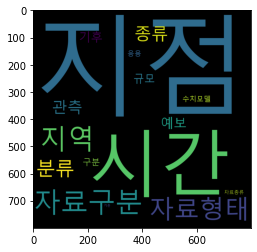

In [218]:
val = cloud_dict_chkBox
gen = wc.generate_from_frequencies(val)
plt.figure()
plt.imshow(gen)
chkBox_total_groupBy.head(5)

328653

,체크박스항목전처리,index
15,지점,1013194
7,시간,328653
10,자료구분,319420
14,지역,316702
12,자료형태,312388


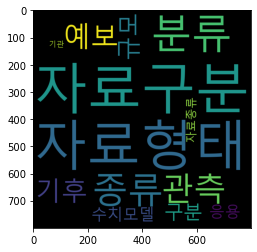

In [223]:
# 주요 제외 필터
cloud_dict_chkBox_ex = cloud_dict_chkBox.copy()
cloud_dict_chkBox_ex.pop('지점')
cloud_dict_chkBox_ex.pop('시간')
cloud_dict_chkBox_ex.pop('지역')

val = cloud_dict_chkBox_ex
gen = wc.generate_from_frequencies(val)
plt.figure()
plt.imshow(gen)
chkBox_total_groupBy.head(5)

In [221]:
cloud_dict_chkBox

{'지점': 1013194,
 '시간': 328653,
 '자료구분': 319420,
 '지역': 316702,
 '자료형태': 312388,
 '분류': 162115,
 '종류': 122528,
 '관측': 101698,
 '예보': 73138,
 '기후': 63824,
 '규모': 53534,
 '구분': 32661,
 '응용': 21594,
 '수치모델': 20974,
 '자료종류': 9296,
 '기관': 3051}

In [ ]:
cloud_dict_chkBox_ex = 

In [ ]:
val = cloud_dict_chkBox
gen = wc.generate_from_frequencies(val)
plt.figure()
plt.imshow(gen)
chkBox_total_groupBy.head(5)

In [166]:
chkBox_total.groupby('체크박스항목').sum()

,index
체크박스항목,
관측,92005
관측-GTS고층,4239
관측-레윈존데,2697
관측-윈드프로파일러(UHC),2757
구분,32661
규모,53534
기관,3051
기후,22347
기후-반응가스,6730


In [70]:
#제공자료컬럼 널 삭제
# 한 엑셀 파일에 저장
writer=pd.ExcelWriter(output_path + "lar_catgr.xlsx", engine='openpyxl')

for i,j in zip(range(len(lar_catgr)), lar_catgr):
    globals()["data_lar_{}".format(i)] = globals()["data_lar_{}".format(i)][globals()["data_lar_{}".format(i)]['제공자료컬럼'].notna()]
    globals()["data_lar_groupBy_{}".format(i)]= globals()["data_lar_{}".format(i)].groupby(['제공자료컬럼']).sum().reset_index().sort_values('INDEX', ascending = False)
    globals()["noun_{}".format(i)] = globals()["data_lar_groupBy_{}".format(i)].iloc[:,0].to_list()
    globals()["cnt_{}".format(i)] = globals()["data_lar_groupBy_{}".format(i)].iloc[:,1].to_list()
    globals()["cloud_dict_{}".format(i)] = dict(zip(globals()["noun_{}".format(i)],globals()["cnt_{}".format(i)]))
    globals()["data_lar_groupBy_{}".format(i)].to_excel(writer, sheet_name=j)
writer.save()

# noun = data_lar_groupBy_3.iloc[:,0].to_list()
# cnt = data_lar_groupBy_3.iloc[:,1].to_list()
# cloud_dict = dict(zip(noun,cnt))

KeyError: 'data_lar_0'

In [ ]:
# 워드 클라우드 사이즈 참고
okt = Okt()
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)

In [ ]:
val = cloud_dict_0
gen = wc.generate_from_frequencies(val)
print(lar_catgr[0])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_0.head(5)

In [ ]:
val = cloud_dict_1
gen = wc.generate_from_frequencies(val)
print(lar_catgr[1])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_1.head(5)

In [ ]:
val = cloud_dict_2
gen = wc.generate_from_frequencies(val)
print(lar_catgr[2])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_2.head(5)

In [ ]:
val = cloud_dict_3
gen = wc.generate_from_frequencies(val)
print(lar_catgr[3])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_3.head(5)

In [ ]:
val = cloud_dict_4
gen = wc.generate_from_frequencies(val)
print(lar_catgr[4])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_4.head(5)

In [ ]:
val = cloud_dict_5
gen = wc.generate_from_frequencies(val)
print(lar_catgr[5])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_5.head(5)

In [ ]:
val = cloud_dict_6
gen = wc.generate_from_frequencies(val)
print(lar_catgr[6])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_6.head(5)

In [ ]:
val = cloud_dict_7
gen = wc.generate_from_frequencies(val)
print(lar_catgr[7])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_7.head(5)

In [ ]:
val = cloud_dict_8
gen = wc.generate_from_frequencies(val)
print(lar_catgr[8])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_8.head(5)

In [ ]:
val = cloud_dict_9
gen = wc.generate_from_frequencies(val)
print(lar_catgr[9])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_9.head(5)

In [ ]:
val = cloud_dict_10
gen = wc.generate_from_frequencies(val)
print(lar_catgr[10])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_10.head(5)

In [ ]:
val = cloud_dict_11
gen = wc.generate_from_frequencies(val)
print(lar_catgr[11])
plt.figure()
plt.imshow(gen)
data_lar_groupBy_11.head(5)

In [ ]:
data['대분류'].drop_duplicates().reset_index()['대분류']

In [ ]:
data['중분류'].drop_duplicates().reset_index()

In [ ]:
a = data['중분류'].drop_duplicates().reset_index()
aa = a['index'].to_list()
data.loc[aa,'대분류']

In [ ]:
data.loc[aa,'대분류']

In [ ]:
col_list = data.columns.to_list()

In [ ]:
col = col_list[6]
print(col)
data[col].str.split('-').map(lambda x : x)

In [ ]:
col = col_list[8]
print(col)
data[col].str.split('-').map(lambda x: x)

In [ ]:
# 컬럼 추리기
col = col_list[6]
print(col)
tmp = data.loc[data[col].notna(), col].reset_index()
tmp = tmp['체크박스항목1']
# data[col].str.split('-').map(lambda x: x)
tmp

In [ ]:
len(tmp)

In [ ]:
tmp.head(100)

In [ ]:
# '-' 포함한 단어들만 추리기
tmp_list = []
for i in range(len(tmp)):
    if re.findall('-', tmp[i]) == ['-']:
        tmp_list.append(i)

In [ ]:
tmp[35].split('-')

In [ ]:
tmp[tmp_list]

In [ ]:
tmp[0]

In [ ]:
tmp.isin('-')

In [ ]:
tmp.str.split('-').map(lambda x: x[0])

In [ ]:
os.getcwd()

# 워드 클라우드 ( 테스트)

In [ ]:
import jpype

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import jpype
from konlpy.tag import Okt # <- jpype 부터 불러와야 불러오기 가능
from PIL import Image
import numpy as np

In [ ]:
with open(input_path + 'test1.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [ ]:
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [ ]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [ ]:
wc = WordCloud(font_path='malgun', width=10000, height=10000, scale=2.0, max_font_size=2500)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [ ]:
# 엑셀 한 시트에 저장
# #1. 파일 생성
# writer=pd.ExcelWriter('테스트파일명.xlsx', engine='openpyxl')
 
# #2. 생성 파일에 시트명 지정 후 dataframe에 저장한 결과값 넣기
# df1.to_excel(writer, sheet_name='sheet1')
 
 
# # 3. 작성 완료 후 파일 저장
# writer.save()

In [ ]:
# 워드 클라우드

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import jpype
from konlpy.tag import Okt # <- jpype 부터 불러와야 불러오기 가능
from PIL import Image
import numpy as np

with open(input_path + 'test1.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)